In [3]:
import pandas as pd
import numpy as np

In [44]:
df = pd.read_csv('combined_csv_test.csv')

In [45]:
df.isna().sum()

EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [46]:
# REPLACE 99999 by N/A for simplifiaction
df.replace(99999.0, 'na', inplace=True)

In [47]:
df.isnull().sum()

EDA     0
TEMP    0
BVP     0
HR      0
dtype: int64

In [58]:
df.head()

,EDA,TEMP,BVP,HR
0,4.0,4.0,64.0,1.0
1,0.0,34.79,-0.0,118.0
2,0.622764,34.79,-0.0,113.5
3,0.759875,34.79,-0.0,93.0
4,0.883157,34.79,-0.0,93.25


In [54]:
na_count = (df == 'na').mean()
na_count

EDA     0.000208
TEMP    0.000412
BVP     0.000000
HR      0.750747
dtype: float64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451364 entries, 0 to 451363
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EDA     451364 non-null  object 
 1   TEMP    451364 non-null  object 
 2   BVP     451364 non-null  float64
 3   HR      451364 non-null  object 
dtypes: float64(1), object(3)
memory usage: 13.8+ MB


In [61]:
target_column = 'HR'
df[target_column] = df[target_column].apply(lambda x: np.random.uniform(80, 111) if x == "na" else x)

# Save the updated DataFrame back to the same CSV file
file_path = 'combined_csv_test_HR.csv'
df.to_csv(file_path, index=False)

In [62]:
df = pd.read_csv('combined_csv_test_HR.csv')

C:\Users\GANESH\AppData\Local\Temp\ipykernel_6740\951395572.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_csv_test_HR.csv')


In [63]:
df.tail()

,EDA,TEMP,BVP,HR
451359,0.229625,na,3.92,100.788311
451360,0.229625,na,9.85,93.200128
451361,0.228344,na,14.94,105.017030
451362,0.229625,na,19.16,88.112132
451363,0.228344,na,22.43,103.292244


In [64]:
na_count = (df == 'na').mean()
na_count

EDA     0.000208
TEMP    0.000412
BVP     0.000000
HR      0.000000
dtype: float64

<Axes: >

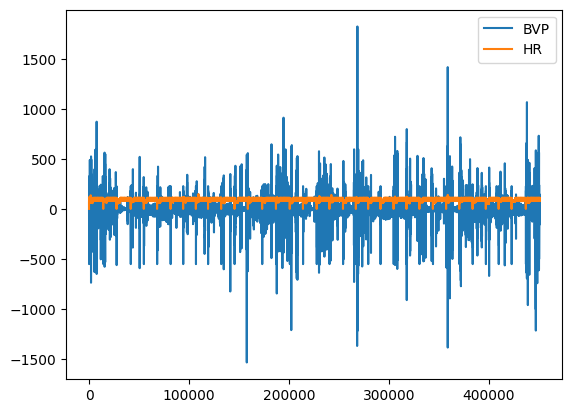

In [65]:
df.plot()

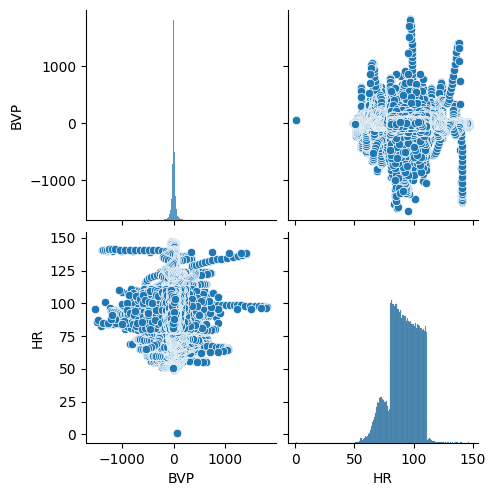

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

# Show the plot
plt.show()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451364 entries, 0 to 451363
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EDA     451364 non-null  object 
 1   TEMP    451364 non-null  object 
 2   BVP     451364 non-null  float64
 3   HR      451364 non-null  float64
dtypes: float64(2), object(2)
memory usage: 13.8+ MB
